**Topic:**        Challenge Set 8  
**Subject:**      Classification Error Metrics 
**Date:**         10/15/2017  
**Name:**         Laura Howard

### Challenge 1

In [1]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  Deprec

In [2]:
df = pd.read_csv('house-votes-84.data.txt', sep=",", header=None)
df.columns = ["democrat", "v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10",
              "v11", "v12", "v13", "v14", "v15", "v16"]

In [3]:
df.head()

,democrat,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
df.replace(('y', 'n', '?', 'democrat', 'republican'), (1, 0, None, 0, 1), inplace=True)

In [5]:
df.head()

,democrat,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,0,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [6]:
df = df.fillna(df.median())

In [7]:
df.head()

,democrat,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,v11,v12,v13,v14,v15,v16
0,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [8]:
selected_col = ["v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10",
              "v11", "v12", "v13", "v14", "v15", "v16"]

In [9]:
X = df.loc[:,selected_col]

y = df['democrat']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [11]:
knn_model2 = KNeighborsClassifier(n_neighbors=16)
knn_model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

In [12]:
# KNN model scores
test_set_pred = knn_model2.predict(X_test)
y_score_knn=knn_model2.predict_proba(X_test)[:,1]
accuracy_score(y_test,test_set_pred)

0.92366412213740456

In [13]:
recall_score(y_test,test_set_pred)

0.88888888888888884

In [14]:
precision_score(y_test,test_set_pred)

0.92307692307692313

In [15]:
f1_score(y_test,test_set_pred)

0.90566037735849059

In [16]:
classification_report(y_test,test_set_pred)

'             precision    recall  f1-score   support\n\n          0       0.92      0.95      0.94        77\n          1       0.92      0.89      0.91        54\n\navg / total       0.92      0.92      0.92       131\n'

In [17]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
# Logistic regression model scores
test_set_pred2 = lr_model.predict(X_test)
y_score_lr = lr_model.predict_proba(X_test)[:,1]
accuracy_score(y_test,test_set_pred2)

0.93893129770992367

In [19]:
classification_report(y_test,test_set_pred2)

'             precision    recall  f1-score   support\n\n          0       0.93      0.97      0.95        77\n          1       0.96      0.89      0.92        54\n\navg / total       0.94      0.94      0.94       131\n'

In [20]:
GNB_model = GaussianNB()
GNB_model.fit(X_train,y_train)

GaussianNB(priors=None)

In [21]:
# Gaussian model scores
test_set_pred3 = GNB_model.predict(X_test)
y_score_gnb = GNB_model.predict_proba(X_test)[:,1]
accuracy_score(y_test,test_set_pred3)

0.93893129770992367

In [22]:
classification_report(y_test,test_set_pred3)

'             precision    recall  f1-score   support\n\n          0       0.93      0.97      0.95        77\n          1       0.96      0.89      0.92        54\n\navg / total       0.94      0.94      0.94       131\n'

In [23]:
SVC_model = SVC(probability=True)
SVC_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# SVC model scores
test_set_pred4 = SVC_model.predict(X_test)
y_score_svc = SVC_model.predict_proba(X_test,)[:,1]
accuracy_score(y_test,test_set_pred4)

0.95419847328244278

In [25]:
classification_report(y_test,test_set_pred4)

'             precision    recall  f1-score   support\n\n          0       0.95      0.97      0.96        77\n          1       0.96      0.93      0.94        54\n\navg / total       0.95      0.95      0.95       131\n'

In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
# Decision Tree model scores
test_set_pred5 = dt_model.predict(X_test)
y_score_dt = dt_model.predict_proba(X_test,)[:,1]
accuracy_score(y_test,test_set_pred5)

0.93893129770992367

In [28]:
classification_report(y_test,test_set_pred5)

'             precision    recall  f1-score   support\n\n          0       0.94      0.96      0.95        77\n          1       0.94      0.91      0.92        54\n\navg / total       0.94      0.94      0.94       131\n'

In [29]:
rf_model = RandomForestClassifier(n_estimators = 500)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [30]:
# Random Forest model scores
test_set_pred6 = rf_model.predict(X_test)
y_score_rf = rf_model.predict_proba(X_test,)[:,1]
accuracy_score(y_test,test_set_pred6)

0.96183206106870234

In [31]:
classification_report(y_test,test_set_pred6)

'             precision    recall  f1-score   support\n\n          0       0.95      0.99      0.97        77\n          1       0.98      0.93      0.95        54\n\navg / total       0.96      0.96      0.96       131\n'

### Challenge 2

In [32]:
from sklearn.metrics import roc_curve, auc

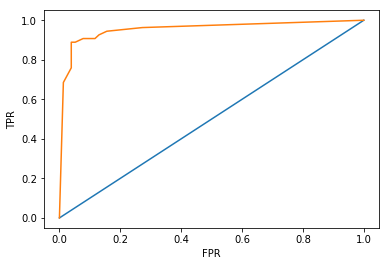

In [33]:
# Plotting KNN model ROC
fpr, tpr,_ = roc_curve(y_test, y_score_knn)
roc_auc_knn = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

In [34]:
roc_auc_knn

0.95490620490620493

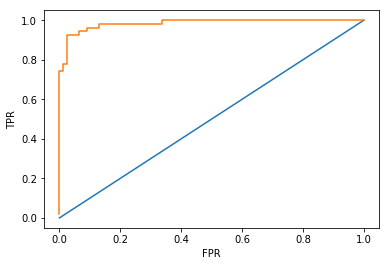

In [35]:
# Plotting logistic regression model ROC
fpr, tpr,_ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

In [36]:
roc_auc_lr

0.98412698412698407

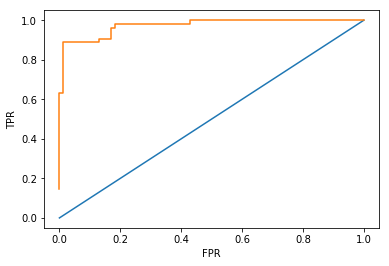

In [37]:
# Plotting Gaussian model ROC
fpr, tpr,_ = roc_curve(y_test, y_score_gnb)
roc_auc_gnb = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

In [38]:
roc_auc_gnb

0.9735449735449736

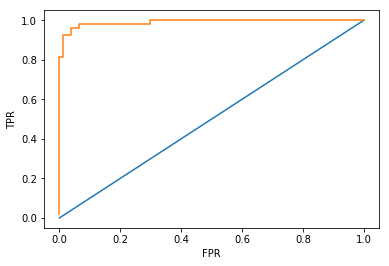

In [39]:
# Plotting SVC model ROC
fpr, tpr,_ = roc_curve(y_test, y_score_svc)
roc_auc_svc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

In [40]:
roc_auc_svc

0.99037999037999036

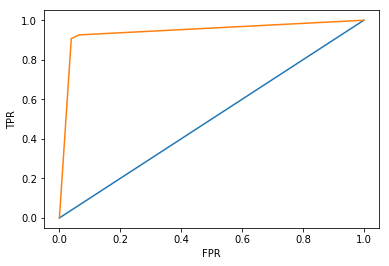

In [41]:
# Plotting Decision Tree model ROC
fpr, tpr,_ = roc_curve(y_test, y_score_dt)
roc_auc_dt = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

In [42]:
roc_auc_dt

0.94191919191919193

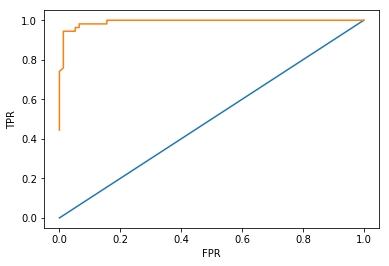

In [43]:
# Plotting Random Forest model ROC
fpr, tpr,_ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

In [44]:
roc_auc_rf

0.99242424242424243

### Challenge 3

In [45]:
scores = ['accuracy','precision','recall','f1']

In [46]:
for score in scores:
    print(score, np.mean(cross_val_score(KNeighborsClassifier(), X, y, scoring=score)))

accuracy 0.919540229885
precision 0.875985694532
recall 0.922619047619
f1 0.898527923845


In [47]:
for score in scores:
    print(score, np.mean(cross_val_score(LogisticRegression(), X, y, scoring=score)))

accuracy 0.96091954023
precision 0.954195804196
recall 0.946428571429
f1 0.949483966725


In [48]:
for score in scores:
    print(score, np.mean(cross_val_score(GaussianNB(), X, y, scoring=score)))

accuracy 0.926436781609
precision 0.907402305184
recall 0.904761904762
f1 0.904885526381


In [49]:
for score in scores:
    print(score, np.mean(cross_val_score(SVC(), X, y, scoring=score)))

accuracy 0.95632183908
precision 0.922573435504
recall 0.970238095238
f1 0.945236866676


In [50]:
for score in scores:
    print(score, np.mean(cross_val_score(DecisionTreeClassifier(), X, y, scoring=score)))

accuracy 0.940229885057
precision 0.900026021337
recall 0.934523809524
f1 0.914915161467


In [51]:
for score in scores:
    print(score, np.mean(cross_val_score(RandomForestClassifier(), X, y, scoring=score)))

accuracy 0.954022988506
precision 0.942929292929
recall 0.940476190476
f1 0.956247456247


### Challenge 4

In [52]:
with open("2013_movies.csv", "r") as f:
    df_movies = pd.DataFrame.from_csv(f)

In [53]:
df_movies.isnull().sum()

Budget                11
DomesticTotalGross     0
Director               4
Rating                 0
Runtime                0
ReleaseDate            0
dtype: int64

In [54]:
df_movies['Budget'].fillna(df_movies.Budget.mean(), inplace=True)

In [55]:
df_movies.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [56]:
import datetime as dt
import dateutil.parser

df_movies['ReleaseDate'] = df_movies['ReleaseDate'].map(dateutil.parser.parse)
df_movies['ReleaseMonth'] = df_movies['ReleaseDate'].dt.month

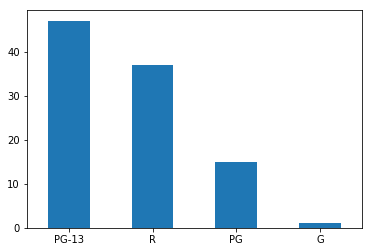

In [57]:
df_movies['Rating'].value_counts().plot(kind='bar')
plt.xticks(rotation=0);

In [58]:
df_movies.head()

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseMonth
Title,,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,5
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,7
Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,6


In [59]:
selected_col3 = ["Budget", "DomesticTotalGross", "ReleaseMonth", "Runtime"]

In [60]:
X3 = df_movies.loc[:,selected_col3]

y3 = df_movies['Rating']

In [61]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=4444)

In [62]:
lr_model3 = LogisticRegression()
lr_model3.fit(X3_train, y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
test_set_pred8 = lr_model3.predict(X3_test)
classification_report(y3_test,test_set_pred8)

/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n         PG       0.00      0.00      0.00         7\n      PG-13       0.48      0.86      0.62        14\n          R       0.40      0.22      0.29         9\n\navg / total       0.34      0.47      0.37        30\n'

In [64]:
knn_model3 = KNeighborsClassifier(n_neighbors = 1)
knn_model3.fit(X3_train, y3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [65]:
test_set_pred9 = knn_model3.predict(X3_test)
classification_report(y3_test,test_set_pred9)

'             precision    recall  f1-score   support\n\n         PG       0.00      0.00      0.00         7\n      PG-13       0.61      0.79      0.69        14\n          R       0.70      0.78      0.74         9\n\navg / total       0.50      0.60      0.54        30\n'

### Challenge 5

In [66]:
df_cancer = pd.read_csv('haberman.data.txt', sep=",", header=None)
df_cancer.columns = ["age", "op_year", "pos_nodes", "5_year_survival"]

In [67]:
df_cancer['5_year_survival'].replace((2), (0), inplace=True)

In [68]:
df_cancer.head()

,age,op_year,pos_nodes,5_year_survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [69]:
selected_col4 = ["age", "op_year", "pos_nodes"]

In [70]:
X4 = df_cancer.loc[:,selected_col4]

y4 = df_cancer['5_year_survival']

In [71]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=4444)

In [72]:
lr_model4 = LogisticRegression()
lr_model4.fit(X4_train, y4_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
test_set_pred10 = lr_model4.predict(X4_test)
y_score_lr2 = lr_model4.predict_proba(X4_test,)[:,1]
classification_report(y4_test,test_set_pred10)

'             precision    recall  f1-score   support\n\n          0       1.00      0.06      0.11        18\n          1       0.81      1.00      0.90        74\n\navg / total       0.85      0.82      0.74        92\n'

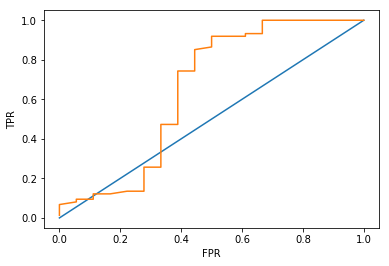

In [74]:
# Plotting Logistic Regression model ROC
fpr, tpr,_ = roc_curve(y4_test, y_score_lr2)
roc_auc_lr = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR');

In [75]:
roc_auc_lr

0.64752252252252251